## Sampling 3

In [3]:
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from scipy import signal
import numpy as np
%matplotlib inline
from IPython.display import Image

### Example
$ T_s = \frac{2 \pi}{{\Omega}_{s}}$<br>
$\begin{cases}x_1(t) = \cos (\Omega _0 t)  & -\infty \leq t \leq \infty \\x_2(t) = \cos ((\Omega _0 + \Omega _s) t) & -\infty \leq t \leq \infty\end{cases}$


In [66]:
Omega0 = 1
Omegas = 3

def x1(t):
    return np.cos( Omega0 * t)

def x2(t):
    return np.cos( (Omega0 + Omegas) * t)

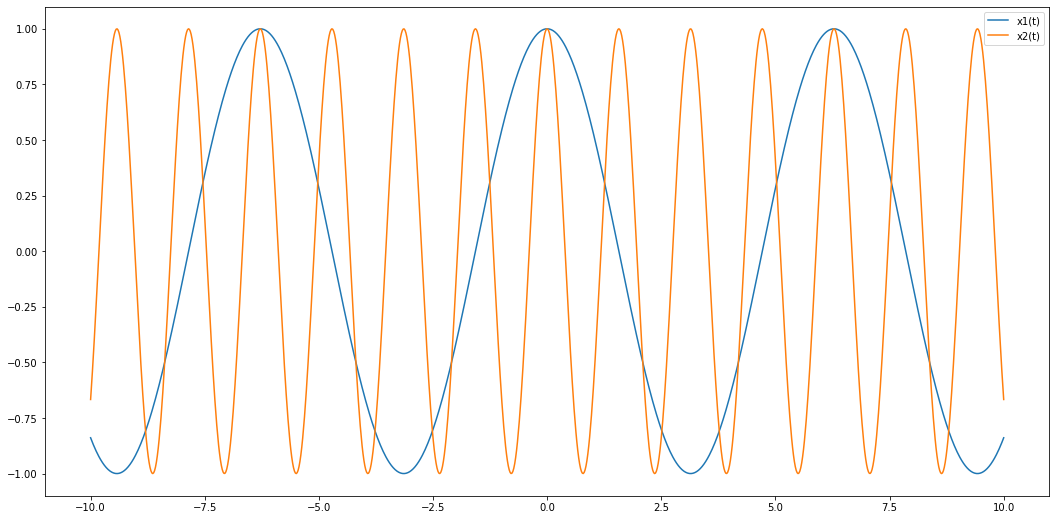

In [67]:
t = np.linspace(-10, 10 , 1000)
plt.figure(figsize=(18,9))
plt.plot(t, x1(t), label = "x1(t)")
plt.plot(t, x2(t), label = "x2(t)")
plt.legend()

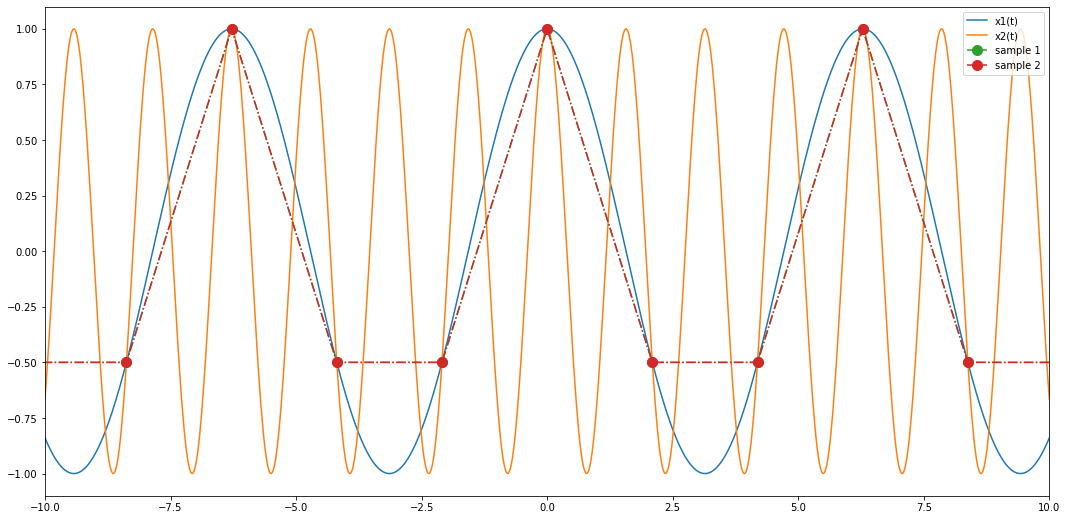

In [68]:
t = np.linspace(-10, 10 , 1000)

plt.figure(figsize=(18,9))
plt.plot(t, x1(t), label = "x1(t)")
plt.plot(t, x2(t), label = "x2(t)")

n = np.array( list(range(-10, 10))) * 2 * np.pi / Omegas
plt.plot( n, x1(n),'o-.', label = 'sample 1', markersize = 10)
plt.plot( n, x2(n),'o-.', label = 'sample 2', markersize = 10)
plt.xlim([np.min(t), np.max(t)])
plt.legend(loc=1)

In [69]:
Omega0 = 1
Omegas = 7

def x1(t):
    return np.cos( Omega0 * t)

def x2(t):
    return np.cos( (Omega0 + Omegas) * t)

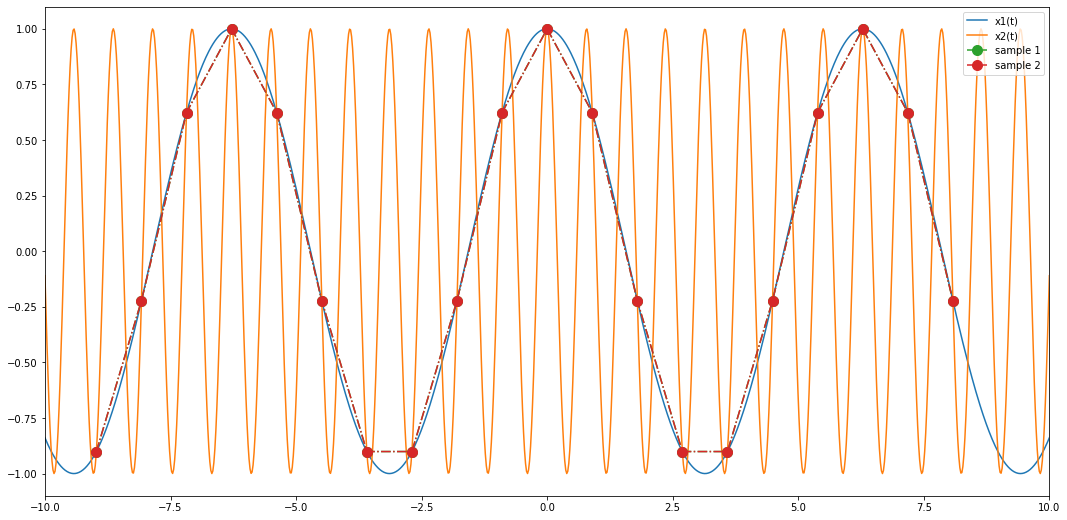

In [70]:
t = np.linspace(-10, 10 , 1000)

plt.figure(figsize=(18,9))
plt.plot(t, x1(t), label = "x1(t)")
plt.plot(t, x2(t), label = "x2(t)")

n = np.array( list(range(-10, 10))) * 2 * np.pi / Omegas
plt.plot( n, x1(n),'o-.', label = 'sample 1', markersize = 10)
plt.plot( n, x2(n),'o-.', label = 'sample 2', markersize = 10)
plt.xlim([np.min(t), np.max(t)])
plt.legend(loc=1)

In [72]:
def h(t, Ts):
    conds = [np.abs(t) < 2e-5, np.abs(t) > 1e-5]
    funds = [
        lambda x: 1,
        lambda x: np.sin(np.pi * x / Ts) / np.pi / (x / Ts)
    ]
    return np.piecewise(t, conds, funds)

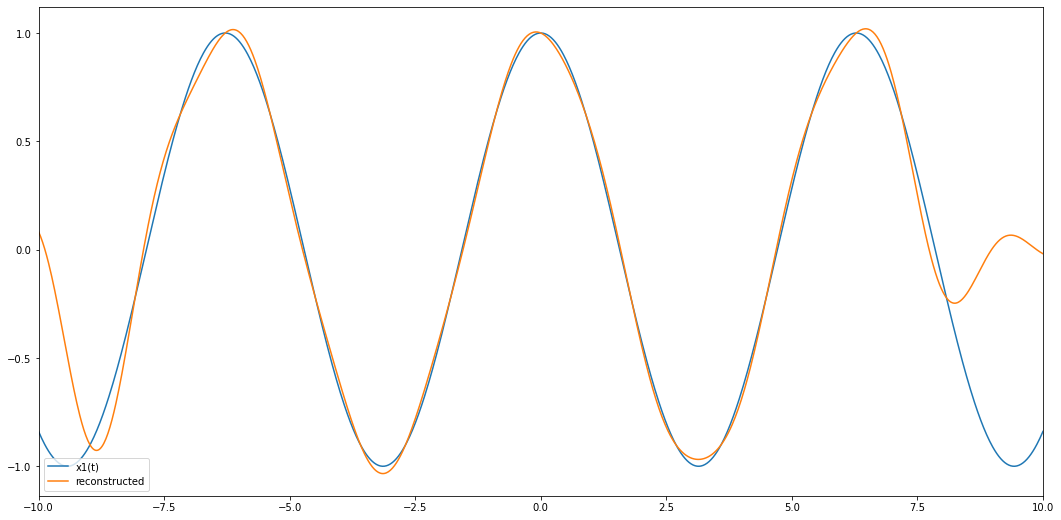

In [79]:
Ts =  2 * np.pi / Omegas

plt.figure(figsize =(18,9))
plt.plot(t, x1(t), label='x1(t)')
xs = n
ys = x1(n)

v = np.zeros_like(t)
for x, y in zip(xs, ys):
    v = v + y * h(t-x, Ts)
    
plt.plot(t, v, label = "reconstructed")

plt.xlim( np.min(t), np.max(t))
plt.legend(loc=3)

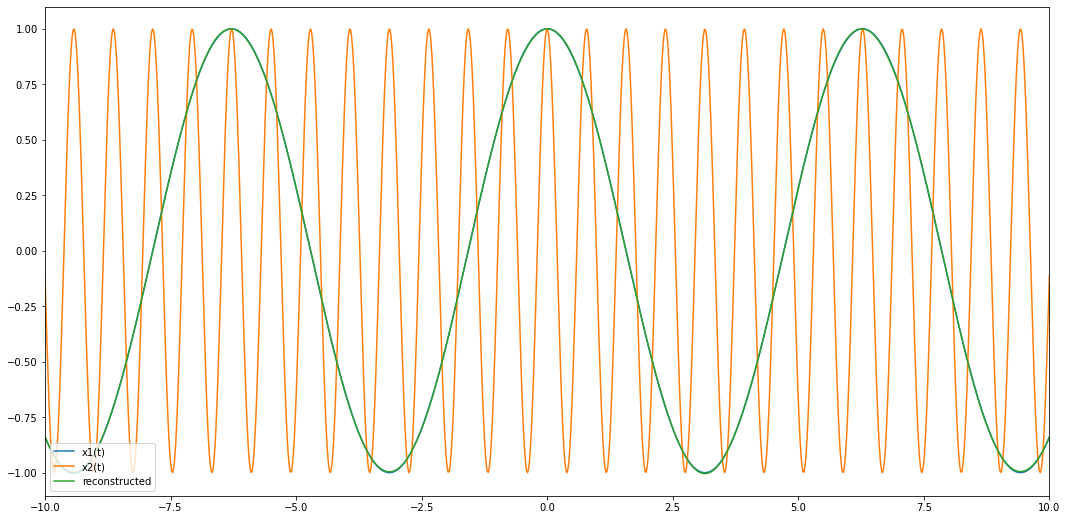

In [80]:
Ts =  2 * np.pi / Omegas

plt.figure(figsize =(18,9))
plt.plot(t, x1(t), label='x1(t)')
plt.plot(t, x2(t), label='x2(t)')
xs = np.array( list(range(-50, 50))) * Ts
ys = x1(xs)

v = np.zeros_like(t)
for x, y in zip(xs, ys):
    v = v + y * h(t-x, Ts)
    
plt.plot(t, v, label = "reconstructed")

plt.xlim( np.min(t), np.max(t))
plt.legend(loc=3)

# x1과는 일치, x2는 일치 하지 않음.